In [138]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# import lazypredict

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

import statsmodels.tsa.stattools as st
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [139]:
df_ger = pd.read_csv('Data/Japan.csv',  index_col='Year')
df_ger # the one with categorical variable for Germany

,Country,ISO 3166-1 alpha-3,Total,Coal,Oil,Gas
Year,,,,,,
1980,Japan,JPN,944.868566,224.299088,630.658672,47.932448
1981,Japan,JPN,926.835495,247.357616,590.551194,48.592160
1982,Japan,JPN,897.407791,242.630080,566.787824,49.746128
1983,Japan,JPN,880.909402,229.795088,559.573408,53.347840
1984,Japan,JPN,937.069892,260.175961,568.097320,71.696872
1985,Japan,JPN,912.400813,271.788192,529.480976,76.980640
1986,Japan,JPN,912.259933,257.465616,540.355728,81.252864
1987,Japan,JPN,902.530350,250.394096,536.237392,82.707472
1988,Japan,JPN,985.464274,278.511632,584.909968,86.206592


In [140]:
# Drop the categorial variables
df= df_ger.select_dtypes(include=['float64'])
df

,Total,Coal,Oil,Gas
Year,,,,
1980,944.868566,224.299088,630.658672,47.932448
1981,926.835495,247.357616,590.551194,48.592160
1982,897.407791,242.630080,566.787824,49.746128
1983,880.909402,229.795088,559.573408,53.347840
1984,937.069892,260.175961,568.097320,71.696872
1985,912.400813,271.788192,529.480976,76.980640
1986,912.259933,257.465616,540.355728,81.252864
1987,902.530350,250.394096,536.237392,82.707472
1988,985.464274,278.511632,584.909968,86.206592


In [141]:
#  plot to see total emission versus year for 'Germany'
fig_ger = px.line(df, x=df.index, y="Total")
fig_ger.update_xaxes(rangeslider_visible=True)
fig_ger.show()

Visualize the time series

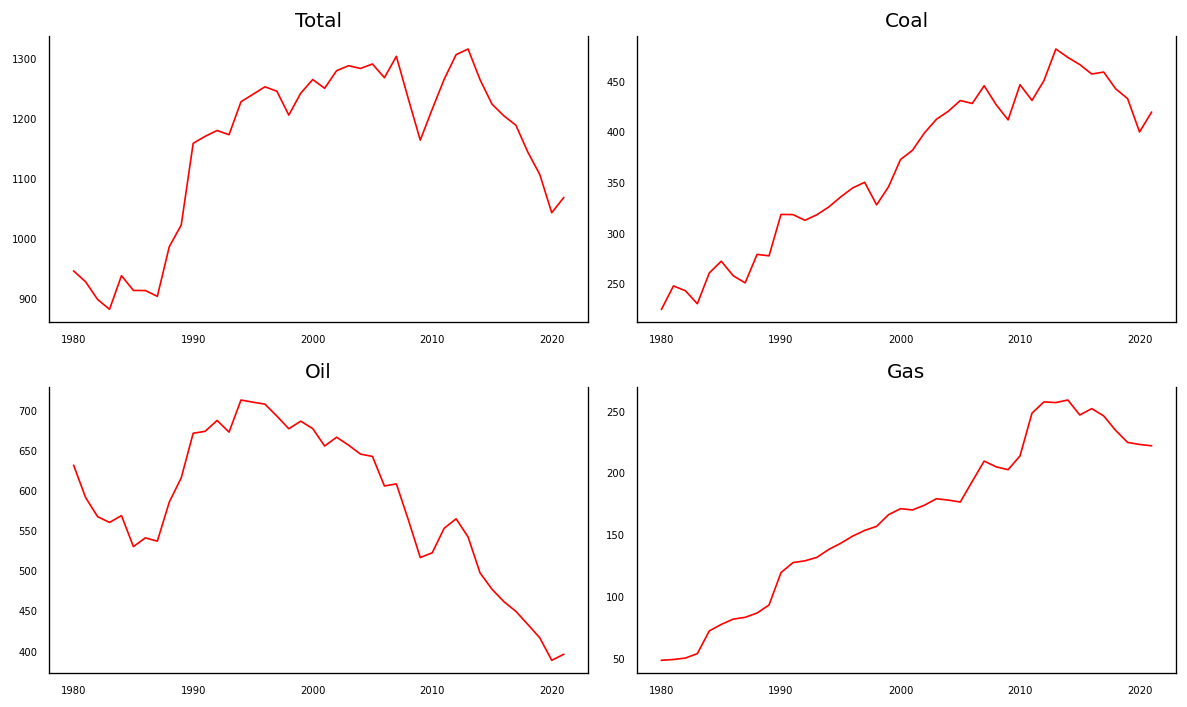

In [142]:
# Plot
fig, axes = plt.subplots(nrows=2, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

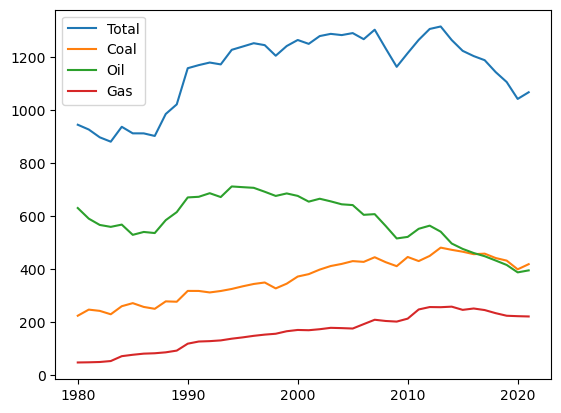

In [143]:
plt.figure()

x = df.index
y1 = df['Total']
y2 = df['Coal']
y3 = df['Oil']
y4 = df['Gas']






plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.plot(x,y4)




plt.legend(['Total', 'Coal', 'Oil', 'Gas'])

Grainger's Causality Test

In [144]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns)   

,Total_x,Coal_x,Oil_x,Gas_x
Total_y,1.0,0.0,0.0,0.0
Coal_y,0.0,1.0,0.0,0.0
Oil_y,0.0,0.0,1.0,0.0
Gas_y,0.0,0.0,0.0,1.0


 Cointegration Test

In [145]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Total  ::  133.0     > 40.1749   =>   True
Coal   ::  63.42     > 24.2761   =>   True
Oil    ::  25.85     > 12.3212   =>   True
Gas    ::  7.64      > 4.1296    =>   True


Split the Series into Training and Testing Data

In [146]:
nobs = 5
df_train, df_test = df[0:-nobs], df[-nobs:]

# Check size
print(df_train.shape)  
print(df_test.shape) 

(37, 4)
(5, 4)


Check for Stationarity and Make the Time Series Stationary

In [147]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [148]:
# ADF Test on each column
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Total" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.4667
 No. Lags Chosen       = 0
 Critical value 1%     = -3.627
 Critical value 5%     = -2.946
 Critical value 10%    = -2.612
 => P-Value = 0.5499. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Coal" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.0979
 No. Lags Chosen       = 0
 Critical value 1%     = -3.627
 Critical value 5%     = -2.946
 Critical value 10%    = -2.612
 => P-Value = 0.7159. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Oil" 
    -----------------------------------------------
 Null Hypothesis: Data has unit ro

In [149]:
# The ADF test confirms none of the time series is stationary. Let’s difference all of them once and check again.
# 1st difference
df_differenced = df_train.diff().dropna()

In [150]:
# Re-run ADF test on each differenced series.
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')
    ### result: all the time series became stationary ###

    Augmented Dickey-Fuller Test on "Total" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.8705
 No. Lags Chosen       = 0
 Critical value 1%     = -3.633
 Critical value 5%     = -2.949
 Critical value 10%    = -2.613
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Coal" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.092
 No. Lags Chosen       = 0
 Critical value 1%     = -3.633
 Critical value 5%     = -2.949
 Critical value 10%    = -2.613
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Oil" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 

How to Select the Order (P) of VAR model

In [151]:
# To select the right order of the VAR model, we iteratively fit increasing orders of VAR model and pick the order that gives a model with least AIC.
# Though the usual practice is to look at the AIC, you can also check other best fit comparison estimates of BIC, FPE and HQIC.

model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  17.87995605765507
BIC :  18.768726378506162
FPE :  58692775.63725183
HQIC:  18.186759447431672 

Lag Order = 2
AIC :  17.90448847982686
BIC :  19.520634917655734
FPE :  62842275.66317561
HQIC:  18.45564070007701 

Lag Order = 3
AIC :  18.301371787154082
BIC :  20.659504914313384
FPE :  106269951.54412901
HQIC:  19.094811835550033 

Lag Order = 4
AIC :  17.96532991610244
BIC :  21.08001870955186
FPE :  103017589.56978309
HQIC:  18.997761131475297 

Lag Order = 5
AIC :  16.761738102257866
BIC :  20.647380849895036
FPE :  61652094.799206994
HQIC:  18.0283607508257 

Lag Order = 6
AIC :  11.510472255585174
BIC :  16.181130194459023
FPE :  1858697.776095673
HQIC:  13.004655860262119 

Lag Order = 7
AIC :  -inf
BIC :  -inf
FPE :  inf
HQIC:  -inf 

Lag Order = 8
AIC :  -228.11479829436794
BIC :  -221.83440560354197
FPE :  1.5193738214816722e-99
HQIC:  -226.19481963699246 

Lag Order = 9
AIC :  -232.46493529508703
BIC :  -225.3618295110633
FPE :  3.201304176068884e-103
HQI

In [152]:
# An alternate method to choose the order(p) of the VAR models is to use the model.select_order(maxlags) method.
#x = model.select_order(maxlags=6)
#x.summary()

We choose p = 2 as the number of lags (AIC is locally minimum at p=2)

Train the VAR Model of Selected Order(p)

In [153]:
p=2
model_fitted = model.fit(p)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 02, Mar, 2023
Time:                     12:16:19
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    19.5206
Nobs:                     34.0000    HQIC:                   18.4556
Log likelihood:          -461.352    FPE:                6.28423e+07
AIC:                      17.9045    Det(Omega_mle):     2.45637e+07
--------------------------------------------------------------------
Results for equation Total
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const           39.247912        10.536554            3.725           0.000
L1.Total        -3.580529         3.078535           -1.163           0.245
L1.Coal          2.696408         3.283846            0.821           0.412
L1.O

Check for Serial Correlation of Residuals (Errors) using Durbin Watson Statistic. Results close to 2 is alright.

In [154]:
from statsmodels.stats.stattools import durbin_watson

def adjust(val, length= 6): return str(val).ljust(length)
out = durbin_watson(model_fitted.resid)

for col, val in zip(df.columns, out):
    print(adjust(col), ':', round(val, 2))

Total  : 2.21
Coal   : 1.99
Oil    : 2.19
Gas    : 2.14


How to Forecast VAR model using statsmodels

In [155]:
df_differenced

,Total,Coal,Oil,Gas
Year,,,,
1981,-18.033071,23.058528,-40.107478,0.659712
1982,-29.427704,-4.727536,-23.763370,1.153968
1983,-16.498389,-12.834992,-7.214416,3.601712
1984,56.160490,30.380873,8.523912,18.349032
1985,-24.669079,11.612231,-38.616344,5.283768
1986,-0.140880,-14.322576,10.874752,4.272224
1987,-9.729583,-7.071520,-4.118336,1.454608
1988,82.933924,28.117536,48.672576,3.499120
1989,36.217465,-1.406976,30.246320,6.518256


In [156]:
# In order to forecast, the VAR model expects up to the lag order number of observations from the past data.
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input # the output is the values of total, coal, oil and gas for 2015 and 2016 (this depends on the train test split and lag_order)

2


array([[-40.80809 ,  -7.103759, -20.392552, -12.119828],
       [-19.716955,  -9.279079, -15.500187,   5.167303]])

In [157]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs) # nobs is from test train split ratio
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_2d')
df_forecast

,Total_2d,Coal_2d,Oil_2d,Gas_2d
Year,,,,
2017,58.889503,21.677129,21.140783,15.259123
2018,12.535972,6.573344,-3.217551,9.938573
2019,5.746396,7.651748,-5.072132,2.828910
2020,-5.101654,2.915563,-10.646116,3.014342
2021,14.531003,7.167925,0.532630,6.788153


Invert the transformation to get the real forecast

In [158]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [159]:
df_results = invert_transformation(df_train, df_forecast, second_diff=True)        
df_results.loc[:, ['Total_forecast', 'Coal_forecast', 'Oil_forecast','Gas_forecast']]

,Total_forecast,Coal_forecast,Oil_forecast,Gas_forecast
Year,,,,
2017,1243.060754,468.949259,466.519172,272.022370
2018,1294.769274,487.920653,468.942217,302.387369
2019,1352.224189,514.543795,466.293129,335.581278
2020,1404.577451,544.082500,452.997926,371.789528
2021,1471.461716,580.789131,440.235352,414.785932


In [160]:
df_test

,Total,Coal,Oil,Gas
Year,,,,
2017,1188.358949,458.482158,448.847338,245.692546
2018,1143.411908,441.964043,432.510939,233.953267
2019,1106.015486,432.250117,415.860472,224.230136
2020,1042.224016,399.366949,387.857350,222.604846
2021,1067.398435,418.820499,395.359389,221.525076


Plot of Forecast vs Actuals

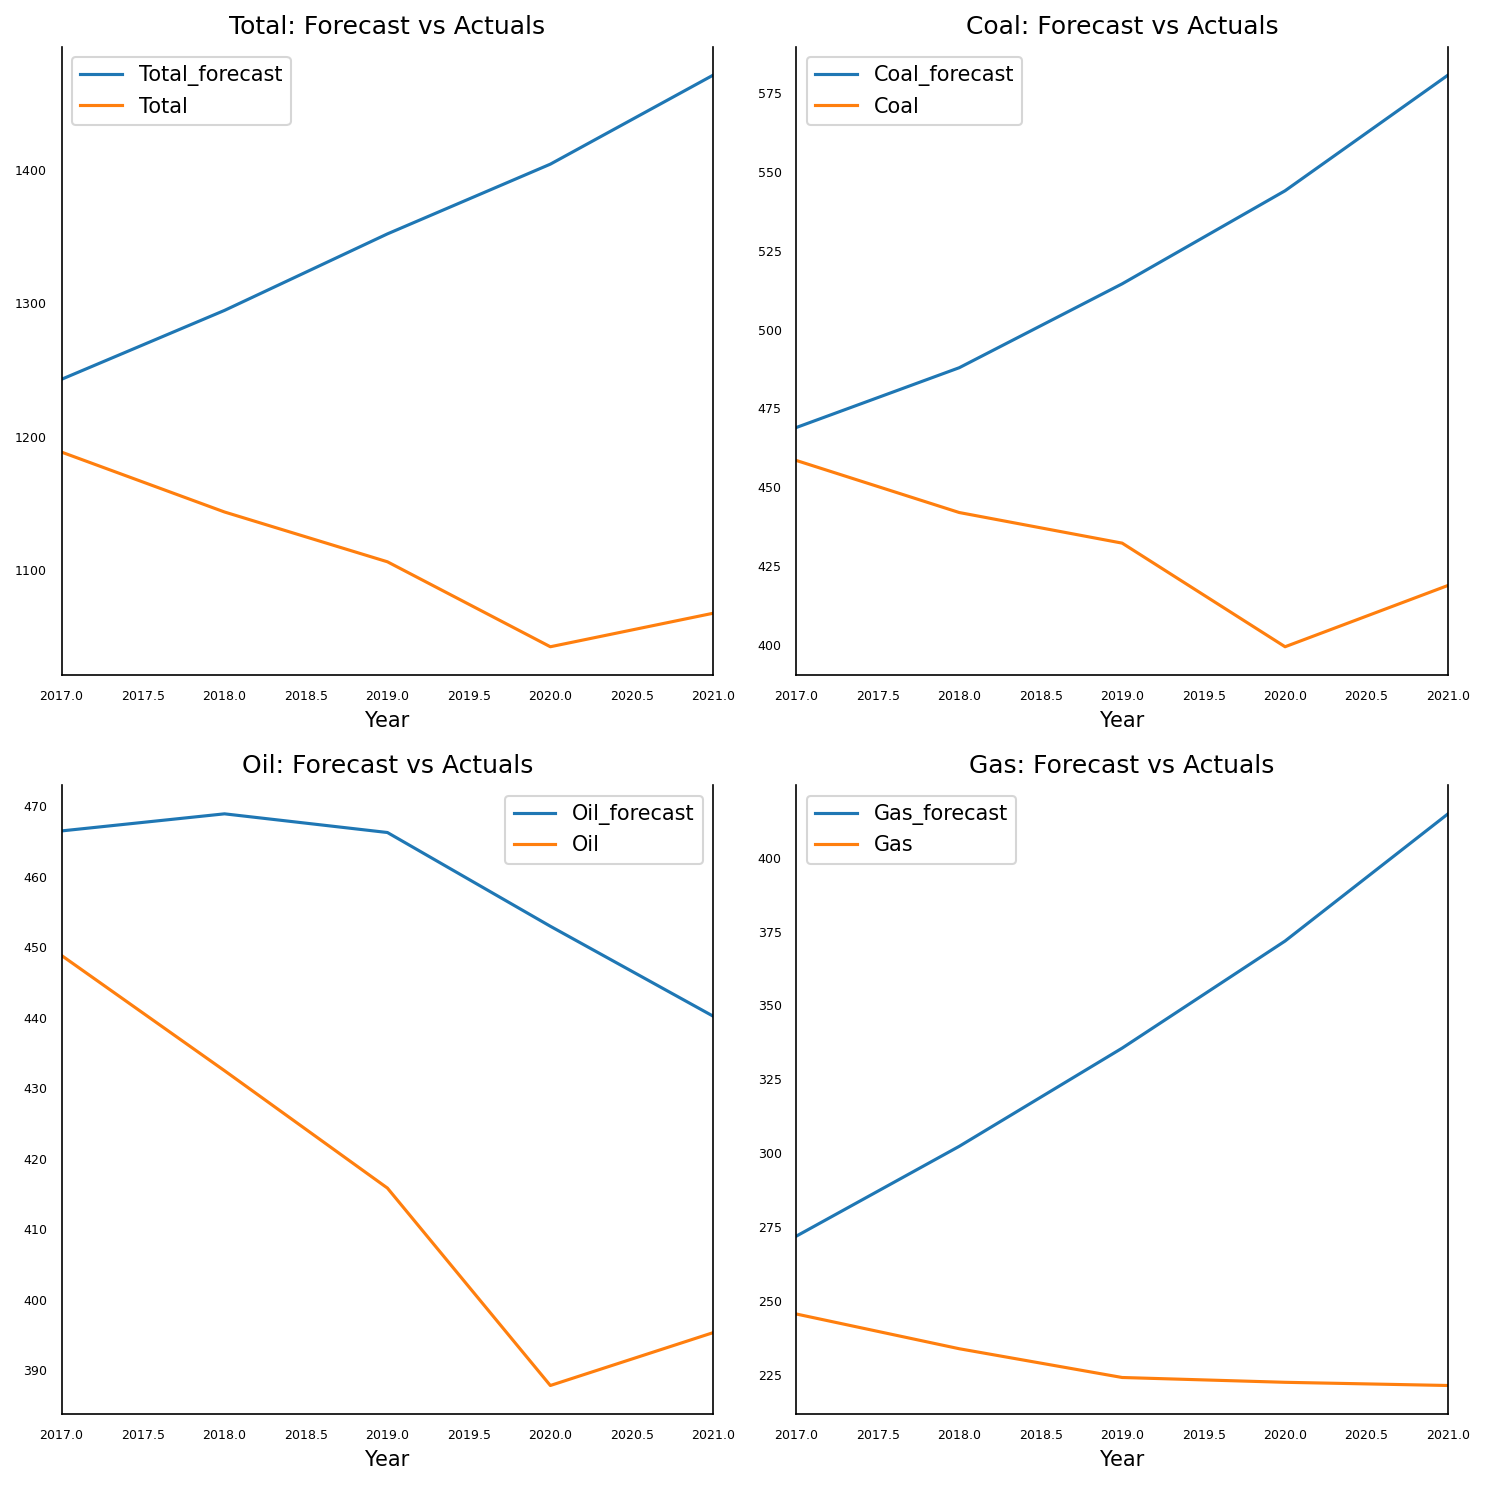

In [161]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

Evaluate the Forecasts

In [162]:
# To evaluate the forecasts, let’s compute a comprehensive set of metrics, namely, the MAPE, ME, MAE, MPE, RMSE, corr and minmax.
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

print('Forecast Accuracy of: Total')
accuracy_prod = forecast_accuracy(df_results['Total_forecast'].values, df_test['Total'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: Coal')
accuracy_prod = forecast_accuracy(df_results['Coal_forecast'].values, df_test['Coal'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: Oil')
accuracy_prod = forecast_accuracy(df_results['Oil_forecast'].values, df_test['Oil'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: Gas')
accuracy_prod = forecast_accuracy(df_results['Gas_forecast'].values, df_test['Gas'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))


Forecast Accuracy of: Total
mape   :  0.2254
me     :  243.7369
mae    :  243.7369
mpe    :  0.2254
rmse   :  276.0751
corr   :  -0.9104
minmax :  0.1751

Forecast Accuracy of: Coal
mape   :  0.2133
me     :  89.0803
mae    :  89.0803
mpe    :  0.2133
rmse   :  105.9908
corr   :  -0.8153
minmax :  0.1643

Forecast Accuracy of: Oil
mape   :  0.1053
me     :  42.9105
mae    :  42.9105
mpe    :  0.1053
rmse   :  45.6949
corr   :  0.7804
minmax :  0.0939

Forecast Accuracy of: Gas
mape   :  0.4878
me     :  109.7121
mae    :  109.7121
mpe    :  0.4878
rmse   :  124.4037
corr   :  -0.8926
minmax :  0.3044


Forecasting the future: for 2 years (since p=2)

In [163]:
df_differenced_all = df.diff().dropna()

In [164]:
df_differenced_all

,Total,Coal,Oil,Gas
Year,,,,
1981,-18.033071,23.058528,-40.107478,0.659712
1982,-29.427704,-4.727536,-23.763370,1.153968
1983,-16.498389,-12.834992,-7.214416,3.601712
1984,56.160490,30.380873,8.523912,18.349032
1985,-24.669079,11.612231,-38.616344,5.283768
1986,-0.140880,-14.322576,10.874752,4.272224
1987,-9.729583,-7.071520,-4.118336,1.454608
1988,82.933924,28.117536,48.672576,3.499120
1989,36.217465,-1.406976,30.246320,6.518256


In [165]:
forecast_input_all = df_differenced_all.values[-lag_order:]
forecast_input_all # the output is the values of total, coal, oil and gas for 2015 and 2016 (this depends on the train test split and lag_order)

array([[-63.79147 , -32.883168, -28.003122,  -1.62529 ],
       [ 25.174419,  19.45355 ,   7.502039,  -1.07977 ]])

In [166]:
model_all = VAR(df_differenced_all)
model_fitted_all = model_all.fit(p)
model_fitted_all.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 02, Mar, 2023
Time:                     12:16:20
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    19.5318
Nobs:                     39.0000    HQIC:                   18.5471
Log likelihood:          -536.280    FPE:                6.76617e+07
AIC:                      17.9962    Det(Omega_mle):     2.94874e+07
--------------------------------------------------------------------
Results for equation Total
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const           16.039354         8.943023            1.794           0.073
L1.Total        -4.657076         3.372766           -1.381           0.167
L1.Coal          4.136347         3.567136            1.160           0.246
L1.O

In [167]:
# Forecast

l = df_differenced_all.last_valid_index() # gives the index of the last row in df_differenced_all
s = 10 # steps to future
fc_all = model_fitted_all.forecast(y=forecast_input_all, steps=s) 
df_forecast_all = pd.DataFrame(fc_all, index=list(range(l+1,l+s+1)), columns=df.columns + '_2d')
df_forecast_all

,Total_2d,Coal_2d,Oil_2d,Gas_2d
2022,-3.297613,0.937512,-9.356042,6.164950
2023,29.666716,11.875137,8.528317,7.969260
2024,3.063814,3.980564,-6.266545,5.515441
2025,7.706174,5.991070,-2.394837,3.933140
2026,0.496633,2.972788,-6.181401,3.935284
2027,6.379570,4.965110,-2.927751,4.332254
2028,4.752292,4.413349,-4.123174,4.576225
2029,6.706312,5.216984,-3.135731,4.627433
2030,5.378030,4.738983,-3.889303,4.588782
2031,5.797491,4.888339,-3.594191,4.535040


In [168]:
# Tranforming the future forecast back
df_results_all = invert_transformation(df, df_forecast_all, second_diff=True) 
df_results_all = df_results_all.loc[:, ['Total_forecast', 'Coal_forecast', 'Oil_forecast','Gas_forecast']]

In [169]:
df_results_all

,Total_forecast,Coal_forecast,Oil_forecast,Gas_forecast
2022,1089.275241,439.211561,393.505386,226.610256
2023,1140.818764,471.477760,400.179699,239.664697
2024,1195.426101,507.724522,400.587467,258.234580
2025,1257.739611,549.962355,398.600399,280.737602
2026,1320.549755,595.172975,390.431929,307.175909
2027,1389.739468,645.348705,379.335708,337.946470
2028,1463.681474,699.937784,364.116312,373.293256
2029,1544.329790,759.743848,345.761186,413.267475
2030,1630.356137,824.288895,323.516756,457.830476
2031,1722.179975,893.722281,297.678135,506.928516


In [170]:
# Concate the actual df with the forecasted df till 2031 (df_results_all)

df_results_all = df_results_all.rename(columns={"Total_forecast": "Total", "Coal_forecast": "Coal", "Oil_forecast": "Oil", "Gas_forecast": "Gas"})
# renaming the df_results_all columns to that of df

df_results_all

,Total,Coal,Oil,Gas
2022,1089.275241,439.211561,393.505386,226.610256
2023,1140.818764,471.477760,400.179699,239.664697
2024,1195.426101,507.724522,400.587467,258.234580
2025,1257.739611,549.962355,398.600399,280.737602
2026,1320.549755,595.172975,390.431929,307.175909
2027,1389.739468,645.348705,379.335708,337.946470
2028,1463.681474,699.937784,364.116312,373.293256
2029,1544.329790,759.743848,345.761186,413.267475
2030,1630.356137,824.288895,323.516756,457.830476
2031,1722.179975,893.722281,297.678135,506.928516


In [171]:
# Concat syntax
df_future  = pd.concat([df, df_results_all], axis=0)
df_future

,Total,Coal,Oil,Gas
1980,944.868566,224.299088,630.658672,47.932448
1981,926.835495,247.357616,590.551194,48.592160
1982,897.407791,242.630080,566.787824,49.746128
1983,880.909402,229.795088,559.573408,53.347840
1984,937.069892,260.175961,568.097320,71.696872
1985,912.400813,271.788192,529.480976,76.980640
1986,912.259933,257.465616,540.355728,81.252864
1987,902.530350,250.394096,536.237392,82.707472
1988,985.464274,278.511632,584.909968,86.206592
1989,1021.681739,277.104656,615.156288,92.724848


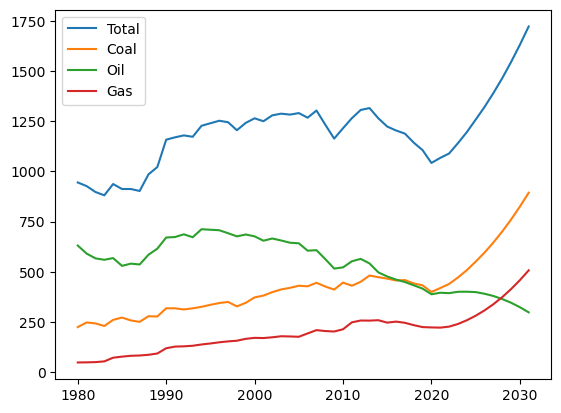

In [172]:
# Plot
plt.figure()

x = df_future.index
y1 = df_future['Total']
y2 = df_future['Coal']
y3 = df_future['Oil']
y4 = df_future['Gas']

plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.plot(x,y4)

plt.legend(['Total', 'Coal', 'Oil', 'Gas'])

In [173]:
# save to csv
df_future.to_csv('Data/Japan_future.csv', index=False)